In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from pandas import datetime
%matplotlib inline
%config IPCompleter.greedy=True
import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving PEDIDOSDEAJUDA.csv to PEDIDOSDEAJUDA.csv


In [0]:
import io
#def parser(x):
 #   return datetime.strptime(x, '%d-%m-%Y') 
#, parse_dates=[0], date_parser=parser
aid_ict = pd.read_csv(io.BytesIO(uploaded['PEDIDOSDEAJUDA.csv']))
aid_ict2 = pd.read_csv(io.BytesIO(uploaded['PEDIDOSDEAJUDA.csv']))

In [9]:
aid_ict.head()

,ICT's',ACTION,DAY,HOUR
0,ICT--030,MUDAR BASE,9,20
1,ICT--018,MUDAR BASE,9,20
2,ICT--019,MUDAR BASE,9,21
3,ICT--024,OUTROS,10,1
4,ICT--018,MUDAR BASE,10,7


In [0]:
aid_ict_day = aid_ict.groupby("DAY").count()
aid_ict_hour = aid_ict.groupby("HOUR").count()

In [11]:
aid_ict_hour.head()

,ICT's',ACTION,DAY
HOUR,,,
0,23,23,23
1,20,20,20
2,11,11,11
3,10,10,10
4,12,12,12


In [12]:
fig = go.Figure()
fig.add_trace(go.Bar(x=aid_ict_day.index, y = aid_ict_day["ICT's'"],
                    name='Qty Pedidos de Ajuda'))
#fig0.add_trace(go.Scatter( y = result['modelo'],
 #                   mode='lines+markers',
  #                  name='lines+markers'))


fig.update_layout(title='QTY de Pedidos de Ajuda respondidos pelos Técnicos',
                   xaxis_title='Dias (MARÇO)',
                   yaxis_title='Qty Pedidos de Ajuda')


fig.show()

In [13]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=aid_ict_hour.index, y = aid_ict_hour["ICT's'"]
                    ))
fig1.add_trace(go.Scatter(x=aid_ict_hour.index, y = aid_ict_hour["ICT's'"]
                    ))
#fig0.add_trace(go.Scatter( y = result['modelo'],
 #                   mode='lines+markers',
  #                  name='lines+markers'))

fig1.update_layout(title='QTY de Pedidos de Ajuda p/ Hora',
                   xaxis_title='Hora',
                   yaxis_title='Qty Pedidos de Ajuda')
  
fig1.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=6,
            y0=0,
            x1=6,
            y1=60,
            line=dict(
                color="LightSeaGreen",
                width=3
            )))

fig1.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=14,
            y0=0,
            x1=14,
            y1=60,
            line=dict(
                color="LightSeaGreen",
                width=3
            )))

fig1.show()

In [14]:
aid_ict_hour.head()

,ICT's',ACTION,DAY
HOUR,,,
0,23,23,23
1,20,20,20
2,11,11,11
3,10,10,10
4,12,12,12


In [15]:
crosstab_hour= pd.crosstab(aid_ict["ICT's'"], aid_ict["HOUR"]
                           ).style.background_gradient(cmap="Greens")
crosstab_hour

HOUR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
ICT's',,,,,,,,,,,,,,,,,,,,,,,,
ICT--012,5,8,0,2,2,1,3,3,2,4,4,1,1,5,1,3,1,2,4,0,0,0,2,7
ICT--013,1,0,1,1,1,0,3,2,3,0,1,4,3,4,0,2,1,3,0,0,2,3,1,1
ICT--014,3,2,0,2,2,1,8,4,7,0,3,0,6,5,2,3,0,6,2,2,1,4,3,3
ICT--015,2,1,4,0,2,2,6,3,4,2,2,1,6,1,2,0,2,1,2,2,2,1,5,4
ICT--016,1,0,1,0,1,1,3,3,1,2,4,3,1,4,2,0,0,1,0,1,2,0,1,1
ICT--017,2,2,1,0,1,0,7,2,2,2,3,4,3,4,1,2,2,2,2,1,1,1,2,1
ICT--018,0,0,0,0,0,0,0,2,2,1,0,0,1,0,0,2,2,2,2,0,1,1,0,0
ICT--019,0,0,0,0,0,0,2,1,1,1,1,1,3,2,1,0,2,3,5,1,2,3,0,0
ICT--020,0,0,0,0,0,0,1,3,0,0,0,0,0,1,0,1,1,0,0,1,2,1,0,0


In [0]:
pareto_ict = aid_ict["ICT's'"].value_counts()
pareto_ict_df = pd.DataFrame(pareto_ict)

In [17]:
pareto_ict_df['ICT'] = pareto_ict_df.index
pareto_ict_df.reset_index(level=0, inplace=True)
pareto_ict_df.head()

,index,ICT's',ICT
0,ICT--030,80,ICT--030
1,ICT--014,69,ICT--014
2,ICT--012,61,ICT--012
3,ICT--029,57,ICT--029
4,ICT--015,57,ICT--015


In [18]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=pareto_ict_df["ICT"], y = pareto_ict_df["ICT's'"], 
                    name='Qty Pedidos de Ajuda'))
#fig0.add_trace(go.Scatter( y = result['modelo'],
 #                   mode='lines+markers',
  #                  name='lines+markers'))

fig2.update_layout(title='QTY de Pedidos de Ajuda respondidos pelos Técnicos',
                   xaxis_title='ICT #',
                   yaxis_title='Qty Pedidos de Ajuda')
fig2.show()

In [19]:
fig = px.bar(pareto_ict_df, x="ICT", y="ICT's'", color="ICT's'")
fig.update_layout(title='QTY de Pedidos de Ajuda respondidos pelos Técnicos',
                   xaxis_title='ICT #',
                   yaxis_title='Qty Pedidos de Ajuda')

fig.show()

In [20]:
pareto_action = aid_ict["ACTION"].value_counts()
pareto_action_df = pd.DataFrame(pareto_action)
pareto_action_df['ACTIONfChart'] = pareto_action_df.index
pareto_action_df.reset_index(level=0, inplace=True)
pareto_action_df.head()

,index,ACTION,ACTIONfChart
0,OUTROS,224,OUTROS
1,MUDAR BASE,192,MUDAR BASE
2,MUITOS MAUS,69,MUITOS MAUS
3,AVARIADO,68,AVARIADO
4,Ler Cartao,17,Ler Cartao


In [21]:
qty_pedidos_pdia = pareto_action_df.ACTION.sum()/20
print(qty_pedidos_pdia)

28.55


In [22]:
aid_ict.groupby("ACTION").count()

,ICT's',DAY,HOUR
ACTION,,,
AVARIADO,68,68,68
Fechou,1,1,1
Ler Cartao,17,17,17
MUDAR BASE,192,192,192
MUITOS MAUS,69,69,69
OUTROS,224,224,224


In [23]:
count = aid_ict.groupby(["ICT's'", 'ACTION']).size() 
count.head()

ICT's'     ACTION      
ICT--012    AVARIADO        3
            Ler Cartao      1
            MUDAR BASE     18
            MUITOS MAUS     2
            OUTROS         37
dtype: int64

In [30]:
count_melted = pd.DataFrame(count)
count_melted.reset_index(inplace=True)  
count_melted["COUNTING"] = count_melted[0]
count_melted.drop("ICT's'", axis=1, inplace=True)
count_melted["ICT"] = count_melted[]
#count_melted.head(10)

TypeError: ignored

In [37]:
night_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)',
                'rgb(36, 55, 57)', 'rgb(6, 4, 4)']
fig3 = go.Figure()

fig3.add_trace(go.Pie(labels=pareto_action_df["ACTIONfChart"], values=pareto_action_df["ACTION"], name="GHG Emissions",
                      pull=[0, 0, 0.2, 0]))

fig3.update_traces(hole=.4)
fig3.update_layout(title='Ações desempenhadas pelos Pedidos de Ajuda')

fig3.show()

In [0]:
aid_ict2["ICT"] = aid_ict2["ICT's'"]

In [0]:
aid_ict2.drop("ICT's'", axis=1, inplace=True)
aid_ict2.drop("ACTION", axis=1, inplace=True)
aid_ict2.drop("DAY", axis=1, inplace=True)

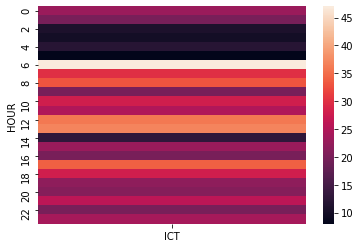

In [28]:
x = aid_ict2.groupby("HOUR").count()
sns.heatmap(x)